# Classification with Logistic Regression

### Importing the modules

In [395]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


### Exploring the dataset

In [396]:
data = pd.read_csv('nasa.csv')

In [397]:
data.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [398]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [399]:
data.isnull().sum()

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

## Data Preprocessing

- Dropping `Neo Reference ID`, `Est Dia in KM(min)`, `Est Dia in KM(max)`, `Est Dia in M(min)`, `Est Dia in M(max)`, `Est Dia in Miles(min)`, `Est Dia in Miles(max)`, `Name`, `Relative Velocity km per hr`, `Miss Dist.(lunar)`, `Miss Dist.(kilometers)`  as they are extraneous with other variables.
- Dropping `Orbiting Body`, `Equinox`, as they only have 1 unique value.

In [400]:
data.drop(['Neo Reference ID', 'Est Dia in KM(max)', 'Est Dia in KM(min)', 'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)', 'Est Dia in Miles(max)', 
           'Name', 'Relative Velocity km per hr', 'Miss Dist.(lunar)', 'Miss Dist.(kilometers)', 'Orbiting Body', 'Equinox'], axis=1, inplace=True)


In [401]:
data.drop(['Close Approach Date', 'Orbit Determination Date'], axis=1, inplace=True)

- `scores_overall` and `stats_number_students` look like float values but are actually object values due to some extra characters in some of the values
- We will remove those and convert the column to float
- we will also round `scores_overall`.

In [402]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Absolute Magnitude            4687 non-null   float64
 1   Est Dia in Feet(min)          4687 non-null   float64
 2   Est Dia in Feet(max)          4687 non-null   float64
 3   Epoch Date Close Approach     4687 non-null   int64  
 4   Relative Velocity km per sec  4687 non-null   float64
 5   Miles per hour                4687 non-null   float64
 6   Miss Dist.(Astronomical)      4687 non-null   float64
 7   Miss Dist.(miles)             4687 non-null   float64
 8   Orbit ID                      4687 non-null   int64  
 9   Orbit Uncertainity            4687 non-null   int64  
 10  Minimum Orbit Intersection    4687 non-null   float64
 11  Jupiter Tisserand Invariant   4687 non-null   float64
 12  Epoch Osculation              4687 non-null   float64
 13  Ecc

In [403]:
# Changing target bool variable of hazardous to 1 and 0 as opposed to true or false
data['Hazardous'] = data['Hazardous'].astype('int64')


In [404]:
data.head()

,Absolute Magnitude,Est Dia in Feet(min),Est Dia in Feet(max),Epoch Date Close Approach,Relative Velocity km per sec,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(miles),Orbit ID,Orbit Uncertainity,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.6,417.388066,933.308089,788947200000,6.115834,13680.509944,0.419483,38993336.0,17,5,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,1
1,21.3,479.225620,1071.581063,788947200000,18.113985,40519.173105,0.383014,35603420.0,21,3,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,0
2,20.3,759.521423,1698.341531,789552000000,7.590711,16979.661798,0.050956,4736657.5,22,0,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,1
3,27.4,28.876199,64.569144,790156800000,11.173874,24994.839864,0.285322,26522368.0,7,6,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,0
4,21.6,417.388066,933.308089,790156800000,9.840831,22012.954985,0.407832,37910368.0,25,1,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,1


## Creating Independent and Dependent Variables

- our target variable is scores_overall
- So we are trying to predict what a given school's overall rating is when we factor in every thing else

In [405]:
data.columns

Index(['Absolute Magnitude', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Miles per hour', 'Miss Dist.(Astronomical)', 'Miss Dist.(miles)',
       'Orbit ID', 'Orbit Uncertainity', 'Minimum Orbit Intersection',
       'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity',
       'Semi Major Axis', 'Inclination', 'Asc Node Longitude',
       'Orbital Period', 'Perihelion Distance', 'Perihelion Arg',
       'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion',
       'Hazardous'],
      dtype='object')

In [406]:
x = data[['Absolute Magnitude', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Miles per hour', 'Miss Dist.(Astronomical)', 'Miss Dist.(miles)',
       'Orbit ID', 'Orbit Uncertainity', 'Minimum Orbit Intersection',
       'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity',
       'Semi Major Axis', 'Inclination', 'Asc Node Longitude',
       'Orbital Period', 'Perihelion Distance', 'Perihelion Arg',
       'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion']]

y = data[['Hazardous']]

## Training set and Test set

In [407]:
x_train, x_rest, y_train, y_rest = train_test_split(x, y, test_size=.30, random_state=42)

In [408]:
x_test, x_val, y_test, y_val = train_test_split(x_rest, y_rest, test_size=.50, random_state=42)

## Logistic Regression

In [409]:
clf = LogisticRegression(max_iter=5000)
clf.fit(x_train.values, y_train)

/Users/bobby/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=5000)

In [410]:
print("Coefficients", clf.coef_)
print("Intercept", clf.intercept_)

Coefficients [[-3.82654019e-23  1.37026884e-21  3.06401427e-21 -1.39563990e-12
   1.38824901e-24  3.10537422e-21 -2.37776194e-25 -2.21026780e-17
   9.72070006e-23 -1.76112860e-23 -4.61843790e-25 -6.12697016e-24
  -2.77798292e-18  2.66114179e-26 -1.54044278e-24 -1.52906394e-23
  -1.83422875e-22 -6.99095767e-22 -1.55315311e-24 -2.24973754e-22
  -1.52773245e-24 -2.77799154e-18 -1.27046319e-22 -8.77027583e-25]]
Intercept [-1.13049208e-24]


## Results

- Viewing actual vs predicted values

In [411]:
x_test.head()

,Absolute Magnitude,Est Dia in Feet(min),Est Dia in Feet(max),Epoch Date Close Approach,Relative Velocity km per sec,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(miles),Orbit ID,Orbit Uncertainity,...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
1545,21.100,525.460443,1174.965271,1079942400000,11.845813,26497.898367,0.467468,43453840.0,12,1,...,1.890802,23.423175,345.866224,949.658442,1.277020,245.172315,2.504584,2.457912e+06,33.427679,0.379084
3066,21.000,550.224631,1230.339678,1302246000000,4.631254,10359.651014,0.283848,26385280.0,15,3,...,1.966103,8.947614,174.540823,1006.949518,1.273254,22.920712,2.658951,2.457670e+06,118.112867,0.357515
44,26.500,43.705896,97.729354,797324400000,7.516462,16813.574269,0.236051,21942320.0,17,1,...,0.988668,4.320908,264.405602,359.065807,0.974877,87.816443,1.002458,2.457942e+06,58.244024,1.002602
1437,19.600,1048.431420,2344.363926,1064214000000,41.111128,91961.483226,0.477821,44416240.0,15,0,...,1.956493,54.753563,164.277544,999.575810,0.754132,93.959626,3.158853,2.457857e+06,51.672117,0.360153
1183,21.613,414.896745,927.737326,1016784000000,8.231308,18412.613010,0.445081,41372844.0,10,9,...,2.090618,19.405481,48.160844,1104.105259,0.924117,74.019518,3.257119,2.452290e+06,340.425562,0.326056


In [412]:
y_pred = clf.predict(x_test.values)

# Convert 2D array to 1D so we can use a dataframe to view results
y_test = np.ravel(y_test)
y_pred = np.ravel(y_pred)


pred_view = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_view.head(10)

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [413]:
print("R-Squared is", clf.score(x_test, y_test))

R-Squared is 0.8591749644381224


/Users/bobby/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [414]:
import math

In [415]:
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

MSE: 0.14
RMSE: 0.38


## Classification Report and Confusion Matrix

In [416]:
cm = confusion_matrix(y_test, np.round(y_pred))
print(cm)

[[604   0]
 [ 99   0]]


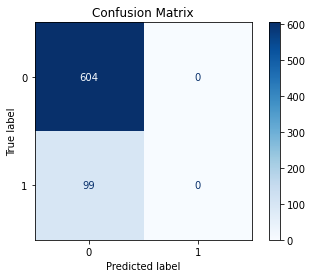

In [417]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [418]:
class_report = classification_report(y_test, np.round(y_pred))
print(class_report)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       604
           1       0.00      0.00      0.00        99

    accuracy                           0.86       703
   macro avg       0.43      0.50      0.46       703
weighted avg       0.74      0.86      0.79       703



/Users/bobby/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bobby/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bobby/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
